In [1]:
import random
import time
import numpy
import copy
import jax
import sympy
from IPython.display import display, Markdown
# sympy.init_printing(use_unicode=True)
import pprint
import matplotlib.pyplot as plt
import pandas

### **Question 1:** How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**Answer:** Let, $A_{n,k}$ and $B_{k,m}$ be two matries. $A \times B = C_{n,m}$.
Each element $c_{i,j}$ in **C**, is a dot product of $i^{th}$ row of matrix **A** and $j^{th}$ column of matrix **B**. And this dot product would need **k** multiplications and **k-1** additions.
To compute each element of **C** we need **k** multiplications and **k-1** additions. Since, **C** will have $n \times m$ elements, total number of multiplications would be $n \times m \times k$ and total additions would be $n \times m \times (k-1)$.

### **Question 2:** Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

**Answer:** In below code cell.

In [2]:
n=262
k=280
m=275
loops = 20
naiveTimes = list()
numpyTimes = list()
for loop in range(0,loops):
    A = [[random.randint(0,100) for i in range(0,k)] for j in range(0,n)] #nxk matrix
    B = [[random.randint(0,100) for i in range(0,m)] for j in range(0,k)] #kxm matrix
    C = [[0 for i in range(0,m)] for j in range(0,n)] #nxm matrix

    naiveStart = time.process_time_ns()
    for i in range(0,n):
        for j in range(0,m):
            sum = A[i][0] * B[0][j]
            for K in range(1,k):
                sum += A[i][K] * B[K][j]
            C[i][j] = sum
    naiveEnd = time.process_time_ns()
    numpyStart = time.process_time_ns()
    C_numpy = numpy.matmul(A,B)
    numpyEnd = time.process_time_ns()
    compare = C_numpy == numpy.array(C)
    assert compare.all() == True
    naiveTime = (naiveEnd-naiveStart)/1000000000
    numpyTime = (numpyEnd-numpyStart)/1000000000
    numpyTimes.append(numpyTime)
    naiveTimes.append(naiveTime)
numpyMean = numpy.array(numpyTimes).mean()
numpyStd = numpy.array(numpyTimes).std()
naiveMean = numpy.array(naiveTimes).mean()
naiveStd = numpy.array(naiveTimes).std()
print("time for naive multiplication:  {0:.9f} ± {1:.9f}s (mean ± std. dev. for {2} loops)".format(naiveMean,naiveStd,loops))
print("time for numpy multiplication:  {0:.9f} ± {1:.9f}s (mean ± std. dev. for {2} loops)".format(numpyMean,numpyStd,loops))


time for naive multiplication:  7.051400291 ± 0.063073129s (mean ± std. dev. for 20 loops)
time for numpy multiplication:  0.050403418 ± 0.000535610s (mean ± std. dev. for 20 loops)


**Numpy** is faster because of the following reasons:

* In the naive approach considerable amount of time is spent on data movement from memory to cache and vice versa. Numpy uses optimised Basic Linear Algebra Subprograms (BLAS) for efficient data movement between cache and memory. There are multiple such algorithms and one such algorithm performs the matrix multiplication by partitioning one matrices into smaller blocks/submatrices and then multiplying in a way similar to multiplying with scalar elements but the scalar elements replaced with sub matrices.
* The naive apprach is a single threaded approach whereas numpy uses multi threading to make the process faster.
* In numpy array, the elements are homogenous. But, in python list elements can be of different types. And this needs lot checks and conversions.

Sources: 
* https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul
* https://www.cs.utexas.edu/users/rvdg/tmp/TSoPMC.pdf

### **Question 3:** Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**Answer:** Finding the median using the naive way described in the question would need $\frac{n}{2} + 1$ passes in the worst case. The time complexity for this would be: $T(n) = n + (n-1) + (n-2) + \ldots \frac{n}{2} = O(n^2)$.

A better method would be as ahown in below psuedocode:

```
FindMedian(list[1...n], pos):
    if n==1:
        return list[1]
    else:
        for i=1 to floor(n/5): ### time taken here is O(n)
            M[i] = naiveMedian(list[5i-4...5i])
        medianOfMedians = FindMedian(M,floor(n/10)) ### time taken here is T(n/5)
        medianOfMediansIndex = findIndex(list, medianOfMedians) ### time taken here in O(n)
        index = quickSortPartition(list[1...n], medianOfMediansIndex) ### time taken here is O(n)
        if index == pos:
            return list[pos]
        else if index > pos:
            FindMedian(list[1..index-1],k) ### time taken here is T(7n/10)
        else:
            FindMedian(list[index+1],k-index) ### time taken here is T(7n/10)
```
In case of odd sized list we can simply call `FindMedian(list, ceil(n/2))`. Otherwise, we can call the function once for position $\frac{n}{2}$ and once for $\frac{n}{2}+1$ and return the average.

We call the above method as **Median of Median method**

In the above algorithm, the pivot for partitioning would be a number in the position between $\frac{3n}{10}$ and $\frac{7n}{10}$ psoitions. So, the time complexity can be represented as $T(n) \leq T(\frac{n}{5}) + T(\frac{7n}{10}) + cn$

This recurrence relation can be solved as follows:
* Let us guess that $T(n) \leq c'n$ and $T(1) = c$ where $c' > c$
* Base Case: when $n = 1$, $T(1) = c \implies T(1) \leq c'$
* Induction Hypothesis: Let us assume that $T(n) \leq c'n $ holds for all $T(1), T(2), \ldots, T(n-1)$
* Inductive step is as follows:

\begin{aligned}
    T(n) &\leq T(\frac{n}{5}) + T(\frac{7n}{10}) + cn\\
    &\leq \frac{c'n}{5} + \frac{c'7n}{10} + cn\\
    &\leq n*(\frac{9c'}{10} + c)
\end{aligned}
* As per guess:
\begin{aligned}
    c' &= \frac{9c'}{10} + c\\
    &= 10c\\
    \implies c' &> c
\end{aligned}
* Therefore, our guess is correct and $T(n) \leq c'n = O(n)$



In [3]:
#implementation of above suggested code : the median of median method
def partition(array, low, high, momi):
    (array[momi], array[high]) = (array[high], array[momi])
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1

def findkth(ip, pos):
    ip = copy.deepcopy(ip)
    if len(ip) < 5:
        ip = sorted(ip)
        return ip[pos]
    else:
        n = len(ip)
        medians = list()
        for i in range(1,(n//5)+1):
            temp = ip[(5*i)-5:5*i]
            temp = sorted(temp)
            medians.append(temp[2])
        mom = findkth(medians, (n//10))
        momi = ip.index(mom)
        index = partition(ip,0,n-1,momi)
        if index == pos:
            return ip[pos]
        elif index > pos:
            return findkth(ip[0:index], pos)
        else:
            return findkth(ip[index+1:], pos-index-1)
def findMedianMOM(ip):
    n = len(ip)
    assert n>0, "empty input list"
    if n%2 != 0:
        return findkth(ip, n//2)
    else:
        ip1 = copy.deepcopy(ip)
        m1 = findkth(ip, (n//2)-1)
        m2 = findkth(ip, (n//2))
        return (m1+m2)/2

In [4]:
# implementation of the multiple pass method
def findMax(ip):
    maxm = ip[0]
    for i in range(1,len(ip)):
        if maxm < ip[i]:
            maxm = ip[i]
    return maxm

def findMedianMultiPass(ip):
    n = len(ip)
    assert n>0, "invalid input list"
    halfn = n//2
    k = n-1
    m1 = 0
    while k>= halfn:
        m1 = findMax(ip)
        ip.remove(m1)
        k = k -1
    if n%2!=0:
        return m1
    else:
        m2 = findMax(ip)
        return (m1+m2)/2

In [5]:
mpTimes = list()
momTimes = list()
npTimes = list()
for loop in range(loops):
    nums = [random.randint(0,4096) for i in range(0,random.randint(14990,15000))]
    nums_numpy = copy.deepcopy(nums)
    nums_multiPass = copy.deepcopy(nums)
    
    multipassStart = time.process_time_ns()
    medianMultiPass = findMedianMultiPass(nums_multiPass)
    multipassEnd = time.process_time_ns()
    
    momStart = time.process_time_ns()
    medianMOM = findMedianMOM(nums)
    momEnd = time.process_time_ns()
    
    npStart = time.process_time_ns()
    numpyMedian = numpy.median(nums_numpy)
    npEnd = time.process_time_ns()
    
    mpTime = (multipassEnd-multipassStart)/1000000000
    momTime = (momEnd-momStart)/1000000000
    npTime = (npEnd-npStart)/1000000000
    
    assert medianMultiPass == medianMOM and medianMOM == numpyMedian
    
    mpTimes.append(mpTime)
    momTimes.append(momTime)
    npTimes.append(npTime)

mpMean = numpy.array(mpTimes).mean()
mpStd = numpy.array(mpTimes).std()
momMean = numpy.array(momTimes).mean()
momStd = numpy.array(momTimes).std()
npMean = numpy.array(npTimes).mean()
npStd = numpy.array(npTimes).std()

print("time for multi pass median:  {0:.9f} ± {1:.9f}s (mean ± std. dev. for {2} loops)".format(mpMean,mpStd,loops))
print("time for median of median:   {0:.9f} ± {1:.9f}s (mean ± std. dev. for {2} loops)".format(momMean,momStd,loops))
print("time for numpy median:       {0:.9f} ± {1:.9f}s (mean ± std. dev. for {2} loops)".format(npMean,npStd,loops))

time for multi pass median:  7.583796459 ± 0.185239042s (mean ± std. dev. for 20 loops)
time for median of median:   0.066210044 ± 0.025930334s (mean ± std. dev. for 20 loops)
time for numpy median:       0.001826845 ± 0.000049405s (mean ± std. dev. for 20 loops)


### **Question 4:** What is the gradient of the following function with respect to x and y?
$$
    x^2y + y^3sin(x)
$$
**Answer:** The gradient is :
$$
\begin{bmatrix}
    2xy + y^3cos(x) \\ x^2 + 3y^2sin(x)
\end{bmatrix}
$$

### **Question 5:** Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

**Answer:** See cells below:

In [6]:
## the given function
def function(x,y):
    return (x**2) * y + (y**3) * jax.numpy.sin(x)
## explicit function to calculate gradient
def function_grad(x,y):
    result = [2*x*y+(y**3)*jax.numpy.cos(x), x**2 + 3*(y**2)*jax.numpy.sin(x)]
    return jax.numpy.array(result)
## function to calculate gradient using jax
jax_grad = jax.grad(function,(0,1))

print("function(pi/2,2.0):{0}\n".format(function(jax.numpy.pi/2,2.0)))

print("gradient using my gradient function at point (pi/2,2.0): {0}".format(function_grad(jax.numpy.pi/2,2.0)))
print("gradient using jax gradient function at point (pi/2,2.0): {0}\n".format(jax_grad(jax.numpy.pi/2,2.0)))

print("gradient using my gradient function at point (pi,5.25): {0}".format(function_grad(jax.numpy.pi,5.25)))
print("gradient using jax gradient function at point (pi,5.25): {0}".format(jax_grad(jax.numpy.pi,5.25)))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


function(pi/2,2.0):12.934802055358887

gradient using my gradient function at point (pi/2,2.0): [ 6.283185  14.4674015]
gradient using jax gradient function at point (pi/2,2.0): (Array(6.283185, dtype=float32, weak_type=True), Array(14.4674015, dtype=float32, weak_type=True))

gradient using my gradient function at point (pi,5.25): [-111.7164       9.8695965]
gradient using jax gradient function at point (pi,5.25): (Array(-111.7164, dtype=float32, weak_type=True), Array(9.869597, dtype=float32, weak_type=True))


### **Question 6:** Use sympy to confirm that you obtain the same gradient analytically.
**Answer:** See cells below

In [7]:
def printMessageExpr(message, expr):
    display(Markdown(message.format(sympy.latex(expr, mode='inline'))))
x,y = sympy.symbols('x y')

sympy_func = (x**2) * y + (y**3) * sympy.sin(x)
printMessageExpr("The function is: {0}", sympy_func)

sympy_grad = sympy.Matrix([sympy.diff(sympy_func,x), sympy.diff(sympy_func,y)])
printMessageExpr("The gradient is: {0}", sympy_grad)

sympy_grad_eval = sympy_grad.evalf(subs={x:sympy.pi/2,y:2.0})
printMessageExpr("The gradient at x=pi/2 and y=2.0 is: {0}", sympy_grad_eval)

sympy_grad_eval = sympy_grad.evalf(subs={x:sympy.pi,y:5.25})
printMessageExpr("The gradient at x=pi and y=5.25 is: {0}", sympy_grad_eval)

The function is: $x^{2} y + y^{3} \sin{\left(x \right)}$

The gradient is: $\left[\begin{smallmatrix}2 x y + y^{3} \cos{\left(x \right)}\\x^{2} + 3 y^{2} \sin{\left(x \right)}\end{smallmatrix}\right]$

The gradient at x=pi/2 and y=2.0 is: $\left[\begin{smallmatrix}6.28318530717959\\14.4674011002723\end{smallmatrix}\right]$

The gradient at x=pi and y=5.25 is: $\left[\begin{smallmatrix}-111.716402137307\\9.86960440108936\end{smallmatrix}\right]$

### **Question 7:** Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

**Answer:** See code below:

In [8]:
ourDict = dict()
fnames = ['Alice', 'John', 'Eve', 'Katty', 'Alia', 'Surendra', 'Rajesh', 'Mahesh']
lnames = ['Gupta', 'Sharma', 'Bhardwaj', 'Patel', 'Lodwal', 'Salvi', 'Shah']
years = [2022,2023,2024,2025]
branches = ['CSE', 'ME', 'CG']
subs = ['Maths', 'ML', 'DL']
for year in years:
    branchDict = dict()
    for branch in branches:
        studentRecords = list()
        for i in range(1,random.randint(2,5)):
            record = dict()
            record['Roll Number'] = i
            record['Name'] = random.choice(fnames) + " " + random.choice(lnames)
            marksDict = dict()
            for sub in subs:
                marksDict[sub] = random.randint(0,100)
            record['Marks'] = marksDict
            studentRecords.append(record)
        branchDict[branch] = studentRecords
    ourDict[year] = branchDict
pprint.pprint(ourDict, sort_dicts=False)
            

{2022: {'CSE': [{'Roll Number': 1,
                 'Name': 'Mahesh Lodwal',
                 'Marks': {'Maths': 7, 'ML': 53, 'DL': 61}},
                {'Roll Number': 2,
                 'Name': 'Mahesh Gupta',
                 'Marks': {'Maths': 7, 'ML': 78, 'DL': 33}},
                {'Roll Number': 3,
                 'Name': 'John Gupta',
                 'Marks': {'Maths': 75, 'ML': 97, 'DL': 91}},
                {'Roll Number': 4,
                 'Name': 'Alia Patel',
                 'Marks': {'Maths': 98, 'ML': 24, 'DL': 71}}],
        'ME': [{'Roll Number': 1,
                'Name': 'Eve Lodwal',
                'Marks': {'Maths': 100, 'ML': 8, 'DL': 17}},
               {'Roll Number': 2,
                'Name': 'Alia Salvi',
                'Marks': {'Maths': 70, 'ML': 38, 'DL': 9}},
               {'Roll Number': 3,
                'Name': 'Katty Patel',
                'Marks': {'Maths': 11, 'ML': 17, 'DL': 90}},
               {'Roll Number': 4,
                'Na

### **Question 8:** Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.
**Answer:** See below cells:

In [9]:
class Marks:
    def __init__(self, subject, score):
        self.__subject = subject
        self.__score = score
    def __repr__(self):
        return "[Subject:{0}".format(self.__subject) + " ; " + "Score:{0}]\n".format(self.__score)
class Student:
    def __init__(self, roll, name, marks=None):
        self.__roll = roll
        self.__name = name
        self.__marks = marks if marks is not None else list()
    def addMarks(self, marks):
        self.__marks.append(marks)
    def __repr__(self):
        return "[Roll No.:{0}".format(self.__roll) + " ; " + "Name:{0}".format(self.__name) + " ; " + "Marks:{0}]\n".format(self.__marks)
class Branch:
    def __init__(self,name,students = None):
        self.__name = name
        self.__students = students if students is not None else list()
    def addStudent(self,student):
        self.__students.append(student)
    def __repr__(self):
        return "[Branch:{0}".format(self.__name) + " ; " + "Students:{0}]\n".format(self.__students)
class Year:
    def __init__(self, year, branches=None):
        self.__year = year
        self.__branches = branches if branches is not None else list()
    def addBranch(self,branch):
        self.__branches.append(branch)
    def __repr__(self):
        return "[Year:{0}".format(self.__year) + " ; " + "Branches:{0}]\n".format(self.__branches)
database = list()
for year in years:
    yearObj = Year(year)
    for branch in branches:
        branchObject = Branch(branch)
        for i in range(1,random.randint(2,5)):
            studentObj = Student(i, random.choice(fnames) + " " + random.choice(lnames))
            for sub in subs:
                marksObj = Marks(sub, random.randint(0,100))
                studentObj.addMarks(marksObj)
            branchObject.addStudent(studentObj)
        yearObj.addBranch(branchObject)
    database.append(yearObj)
print(database)

[[Year:2022 ; Branches:[[Branch:CSE ; Students:[[Roll No.:1 ; Name:Eve Salvi ; Marks:[[Subject:Maths ; Score:98]
, [Subject:ML ; Score:25]
, [Subject:DL ; Score:87]
]]
, [Roll No.:2 ; Name:Eve Gupta ; Marks:[[Subject:Maths ; Score:60]
, [Subject:ML ; Score:57]
, [Subject:DL ; Score:2]
]]
, [Roll No.:3 ; Name:Rajesh Gupta ; Marks:[[Subject:Maths ; Score:90]
, [Subject:ML ; Score:41]
, [Subject:DL ; Score:20]
]]
]]
, [Branch:ME ; Students:[[Roll No.:1 ; Name:Alice Bhardwaj ; Marks:[[Subject:Maths ; Score:71]
, [Subject:ML ; Score:90]
, [Subject:DL ; Score:92]
]]
, [Roll No.:2 ; Name:Rajesh Shah ; Marks:[[Subject:Maths ; Score:27]
, [Subject:ML ; Score:53]
, [Subject:DL ; Score:55]
]]
]]
, [Branch:CG ; Students:[[Roll No.:1 ; Name:Alia Bhardwaj ; Marks:[[Subject:Maths ; Score:29]
, [Subject:ML ; Score:2]
, [Subject:DL ; Score:58]
]]
, [Roll No.:2 ; Name:Mahesh Shah ; Marks:[[Subject:Maths ; Score:56]
, [Subject:ML ; Score:24]
, [Subject:DL ; Score:10]
]]
, [Roll No.:3 ; Name:Katty Lodwal 

### **Question 9:** Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
**Answer:** see below code

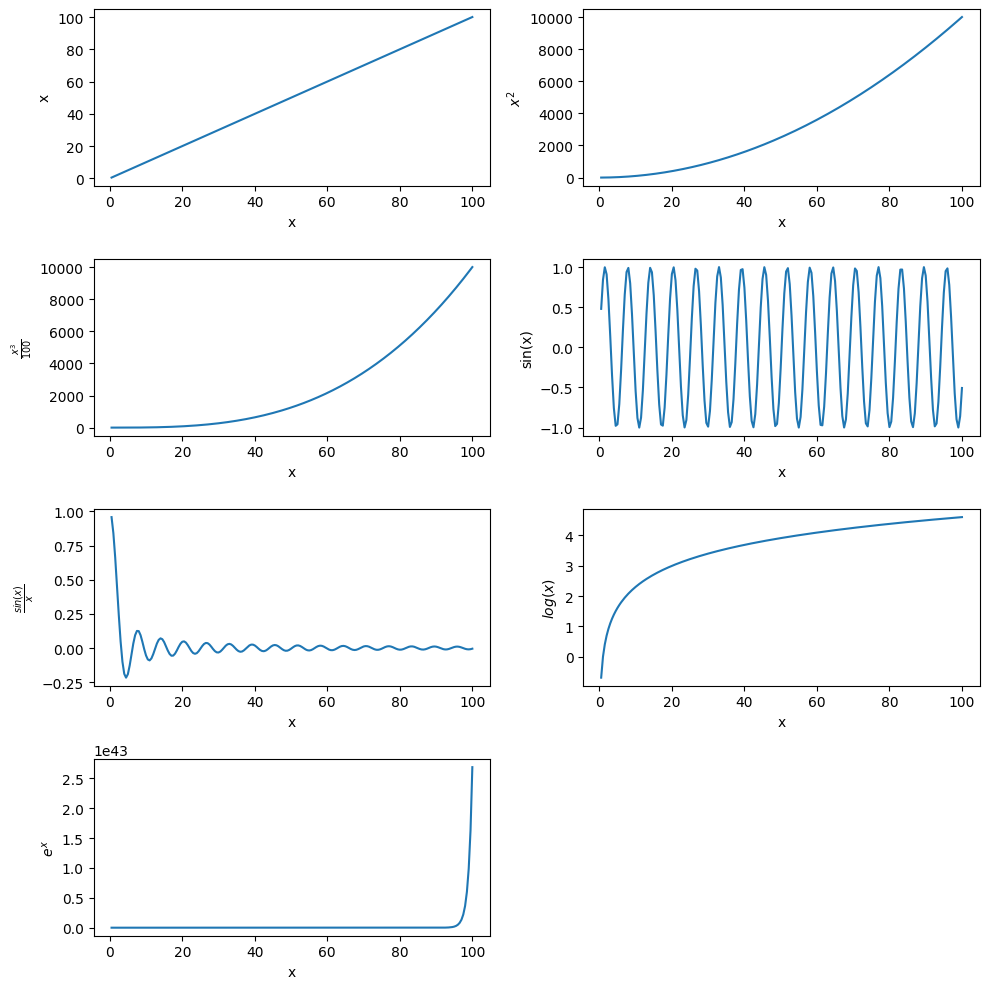

In [10]:
def f(x):
    return x**2
xvalues = numpy.arange(0.5,100.5,0.5, dtype=float)
fig = plt.figure()
plt.subplot(4,2,1)
plt.xlabel("x")
plt.ylabel("x")
plt.plot(xvalues, xvalues)

plt.subplot(4,2,2)
plt.xlabel("x")
plt.ylabel(r"$x^2$")
plt.plot(xvalues, xvalues**2)

plt.subplot(4,2,3)
plt.xlabel("x")
plt.ylabel(r"$\frac{x^3}{100}$")
plt.plot(xvalues, (xvalues**3)/100)

plt.subplot(4,2,4)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.plot(xvalues, numpy.sin(xvalues))

plt.subplot(4,2,5)
plt.xlabel("x")
plt.ylabel(r"$\frac{sin(x)}{x}$")
plt.plot(xvalues, numpy.sin(xvalues)/xvalues)

plt.subplot(4,2,6)
plt.xlabel("x")
plt.ylabel(r"$log(x)$")
plt.plot(xvalues, numpy.log(xvalues))

plt.subplot(4,2,7)
plt.xlabel("x")
plt.ylabel(r"$e^x$")
plt.plot(xvalues, numpy.power(numpy.full(len(xvalues), numpy.e), xvalues))

fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout()
plt.show()

### **Question 10:** Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.
**Answer:** see below code

In [11]:
uniformRandomValues = numpy.random.default_rng().uniform(1.0,2.0,(20,5))
df = pandas.DataFrame(data=uniformRandomValues, columns=['a','b','c','d','e'], index=numpy.arange(1,21))
print(df)

stds_column = df.std(0)
means_row = df.mean(1)
print("="*52)
print("Column with highest standard deviation: {0}".format(stds_column.idxmax()))
print("Row (1 indexing) with lowest mean: {0}".format(means_row.idxmin()))

           a         b         c         d         e
1   1.475483  1.239381  1.683843  1.980703  1.013094
2   1.264578  1.944204  1.295617  1.404948  1.040849
3   1.027408  1.300236  1.515133  1.219537  1.348182
4   1.887050  1.145861  1.545760  1.977370  1.517493
5   1.614254  1.365958  1.090904  1.186788  1.044680
6   1.548048  1.635414  1.168501  1.360189  1.486754
7   1.495790  1.974915  1.772535  1.715128  1.770927
8   1.785397  1.677017  1.229569  1.437709  1.307236
9   1.446814  1.185570  1.378709  1.654724  1.302926
10  1.604516  1.955949  1.853128  1.825550  1.624162
11  1.050450  1.596743  1.434181  1.654415  1.240540
12  1.146047  1.223968  1.456222  1.408574  1.764055
13  1.641517  1.259980  1.130631  1.218809  1.300099
14  1.621680  1.106875  1.411534  1.658518  1.777894
15  1.962432  1.935137  1.767621  1.063180  1.903200
16  1.330253  1.272632  1.504583  1.086953  1.202695
17  1.347921  1.718693  1.872736  1.574883  1.585632
18  1.227873  1.173115  1.308347  1.388327  1.

### **Question 11:** Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [12]:
df['f'] = df.sum(1)
df['g'] = None
df.loc[df['f']<8,'g'] = 'LT8'
df.loc[df['f']>=8,'g'] = 'GT8'
print(df)
print("="*68)
print("Number of rows where 'g' is LT8: {0}".format(len(df.loc[df['g']=='LT8'])))
print("Standard deviation of the column 'f' for the rows where the value in “g” is “LT8”: {0}".format(df.loc[df['g']=='LT8']['f'].std()))
print("Standard deviation of the column 'f' for the rows where the value in “g” is “GT8”: {0}".format(df.loc[df['g']=='GT8']['f'].std()))

           a         b         c         d         e         f    g
1   1.475483  1.239381  1.683843  1.980703  1.013094  7.392504  LT8
2   1.264578  1.944204  1.295617  1.404948  1.040849  6.950197  LT8
3   1.027408  1.300236  1.515133  1.219537  1.348182  6.410495  LT8
4   1.887050  1.145861  1.545760  1.977370  1.517493  8.073533  GT8
5   1.614254  1.365958  1.090904  1.186788  1.044680  6.302584  LT8
6   1.548048  1.635414  1.168501  1.360189  1.486754  7.198906  LT8
7   1.495790  1.974915  1.772535  1.715128  1.770927  8.729296  GT8
8   1.785397  1.677017  1.229569  1.437709  1.307236  7.436927  LT8
9   1.446814  1.185570  1.378709  1.654724  1.302926  6.968744  LT8
10  1.604516  1.955949  1.853128  1.825550  1.624162  8.863304  GT8
11  1.050450  1.596743  1.434181  1.654415  1.240540  6.976330  LT8
12  1.146047  1.223968  1.456222  1.408574  1.764055  6.998866  LT8
13  1.641517  1.259980  1.130631  1.218809  1.300099  6.551037  LT8
14  1.621680  1.106875  1.411534  1.658518  1.77

### **Question 12:** Write a small piece of code to explain broadcasting in numpy.
**Answer:** Broadcasting is the process of stretching a dimension of a numpy array along the other dimension while performing an arithmetic operation. This happens when there is a mismatch of dimension. Stretching happens internally and original arrays don't change.

**Use case:**

Given a 2-D matrix, if we need to perform addition of each row vector with another vector (not part of 2-D matrix) then typically we will have to create a for loop to perfom addition for each row vector of the matrix. Using, broadcasting, we don't need for loop. Basically, this looping happens internally in C intead at Python level which improves time consumption.

**Rules:**

1. Dimension checking happens from right most dimension
2. The dimension should either match or it should be one.

**Example**

In the below code A is 4x3 matrix, B is 1x3 matrix. If we perform A+B, then 2nd dimension matches but 1st dimension of B is 1. So, B is stretch along the 1st dimension giving a illusion as if B is 4x3 matrix (with same row vectors) and addition is performed.

Similarly, in case of A+C, C is stretch along its 2nd dimension giving an illusion as if C is 4x3 matrix.

In case of A+D, 2nd dimesnion of D is 1, but 1st dimension doesn't match and none of them is 1. So, it raises error.

In [13]:
arrayA = numpy.eye(4,3)
arrayB = numpy.array([1,0,1])
arrayC = numpy.array([[1],[0],[1],[0]])
arrayD = numpy.array([[1],[0],[1]])
print("A=")
print(arrayA)
print("B=")
print(arrayB)
print("C=")
print(arrayC)
print("D=")
print(arrayD)
print("A+B=")
print(arrayA + arrayB)
print("A+C=")
print(arrayA + arrayC)
### INTENTIONALLY MADE INCORRECT TO EXPLAIN
try:
    print("A+D=")
    print(arrayA + arrayD)
except Exception as e:
    print("Error: " + str(e))

A=
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
B=
[1 0 1]
C=
[[1]
 [0]
 [1]
 [0]]
D=
[[1]
 [0]
 [1]]
A+B=
[[2. 0. 1.]
 [1. 1. 1.]
 [1. 0. 2.]
 [1. 0. 1.]]
A+C=
[[2. 1. 1.]
 [0. 1. 0.]
 [1. 1. 2.]
 [0. 0. 0.]]
A+D=
Error: operands could not be broadcast together with shapes (4,3) (3,1) 


### **Question 13:** Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [14]:
def argminNew(values):
    mini = numpy.PINF
    i = 0
    idx = numpy.nan
    for v in numpy.nditer(values):
        if v < mini:
            mini = v
            idx = i
        i+=1
    return idx

values = numpy.random.default_rng().uniform(1.0,10.0,(10,10))

print(numpy.argmin(values))
print(argminNew(values))

81
81
